In [9]:
# import packages 
import pandas as pd                   # dataframe
import matplotlib.pyplot as plt       # graphs & other analysis
import matplotlib as mpl              # graphics parameters
import numpy as np                    # numerical calculations 
import datetime as dt                 # data/ time
%matplotlib inline
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
import seaborn

In [10]:
import re
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression

In [11]:
df_original = pd.read_csv("data.csv")

In [12]:
df_original.shape

(627, 7)

In [13]:
df_original.head(3)

,Project,Banner number,Date passed,Date,Impression,Click,CTR
0,A,1,1,Monday,"22,908",611,2.67%
1,A,1,2,Tuesday,"30,317",736,2.43%
2,A,1,3,Wednesday,"30,258",713,2.36%


In [14]:
# The most of the data is string object, and these data need to be cleaned.
df_original.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 627 entries, 0 to 626
Data columns (total 7 columns):
Project          627 non-null object
Banner number    627 non-null int64
Date passed      627 non-null int64
Date             627 non-null object
Impression       627 non-null object
Click            627 non-null object
CTR              627 non-null object
dtypes: int64(2), object(5)
memory usage: 34.4+ KB


In [15]:
df = df_original.copy()
df.head()

,Project,Banner number,Date passed,Date,Impression,Click,CTR
0,A,1,1,Monday,"22,908",611,2.67%
1,A,1,2,Tuesday,"30,317",736,2.43%
2,A,1,3,Wednesday,"30,258",713,2.36%
3,A,1,4,Thursday,"28,464",687,2.41%
4,A,1,5,Friday,"25,650",539,2.10%


In [16]:
df["Date_passed"] = df["Date passed"]
del df["Date passed"]

In [17]:
df['Impression'] = [float(x.replace(',','')) for x in df['Impression']]

In [18]:
df['Click'] = [float(x.replace(',','')) for x in df['Click']]

In [19]:
df['CTR_calculated'] = round(df['Click']/df['Impression'],4)

In [20]:
del df['CTR']

In [21]:
df.head()

,Project,Banner number,Date,Impression,Click,Date_passed,CTR_calculated
0,A,1,Monday,22908.0,611.0,1,0.0267
1,A,1,Tuesday,30317.0,736.0,2,0.0243
2,A,1,Wednesday,30258.0,713.0,3,0.0236
3,A,1,Thursday,28464.0,687.0,4,0.0241
4,A,1,Friday,25650.0,539.0,5,0.0210


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 627 entries, 0 to 626
Data columns (total 7 columns):
Project           627 non-null object
Banner number     627 non-null int64
Date              627 non-null object
Impression        627 non-null float64
Click             627 non-null float64
Date_passed       627 non-null int64
CTR_calculated    627 non-null float64
dtypes: float64(3), int64(2), object(2)
memory usage: 34.4+ KB


In [23]:
df['Date'].value_counts()

 Monday        79
 Wednesday     76
 Saturday      75
 Thursday      75
 Tuesday       75
 Sunday        75
 Friday        75
Thursday       12
Tuesday        12
Monday         12
Wednesday      12
Saturday       11
Friday         11
Sunday          7
 Saturda        3
 Sunda          3
 Tuesda         3
 Frida          3
 Wednesda       2
 Thursda        2
 Monda          2
 Monda          1
 Thursda        1
Name: Date, dtype: int64

In [24]:
df['Date'] = df['Date'].str.strip()

In [25]:
temp_list = []
for x in df["Date"]:
    if re.match(r'\w*a\b',x):
        x += "y"
        temp_list.append(x)
    else:
        x = x
        temp_list.append(x)
df['Date'] = temp_list
        


In [26]:
df['Date'].value_counts()

Monday       94
Tuesday      90
Wednesday    90
Thursday     90
Saturday     89
Friday       89
Sunday       85
Name: Date, dtype: int64

In [27]:
df.head()
df.to_csv('data.csv', sep='\t', encoding='utf-8')

In [28]:
def page_number(x):
    if x < 6 :
        return 1
    elif x < 11:
        return 2
    else:
        return 3
    

In [29]:
df['page_number'] = df['Banner number'].apply(page_number)

In [30]:
df.tail()

,Project,Banner number,Date,Impression,Click,Date_passed,CTR_calculated,page_number
622,I,12,Wednesday,9400.0,11.0,3,0.0012,3
623,I,12,Thursday,8886.0,10.0,4,0.0011,3
624,I,12,Friday,7400.0,12.0,5,0.0016,3
625,I,12,Saturday,5726.0,8.0,6,0.0014,3
626,I,12,Sunday,6511.0,4.0,7,0.0006,3


In [58]:
df2 = df[df['Project']!='A']
df2.head()

,Project,Banner number,Date,Impression,Click,Date_passed,CTR_calculated,page_number
84,B,1,Monday,28053.0,222.0,1,0.0079,1
85,B,1,Tuesday,28075.0,202.0,2,0.0072,1
86,B,1,Wednesday,29191.0,193.0,3,0.0066,1
87,B,1,Thursday,27970.0,165.0,4,0.0059,1
88,B,1,Friday,24463.0,181.0,5,0.0074,1


In [31]:
df.describe()

,Banner number,Impression,Click,Date_passed,CTR_calculated,page_number
count,627.000000,627.000000,627.000000,627.000000,627.000000,627.000000
mean,5.258373,125483.786284,133.497608,10.204147,0.002858,1.622010
std,3.468743,156339.342431,146.985376,6.683138,0.004030,0.628676
min,1.000000,1855.000000,2.000000,1.000000,0.000100,1.000000
25%,1.000000,25143.500000,38.500000,5.000000,0.000500,1.000000
50%,6.000000,58290.000000,91.000000,9.000000,0.001000,2.000000
75%,8.000000,167710.000000,176.000000,14.000000,0.004500,2.000000
max,12.000000,929412.000000,1157.000000,28.000000,0.026700,3.000000


In [32]:
reg1 = smf.ols(formula="Click~Date_passed",data=df).fit()
reg1.params

Intercept      164.012271
Date_passed     -2.990418
dtype: float64

In [33]:
intercept, slope = reg1.params 
reg1.params

Intercept      164.012271
Date_passed     -2.990418
dtype: float64

In [34]:
reg1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Click   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     11.77
Date:                Sat, 13 Aug 2016   Prob (F-statistic):           0.000641
Time:                        22:12:11   Log-Likelihood:                -4012.3
No. Observations:                 627   AIC:                             8029.
Df Residuals:                     625   BIC:                             8037.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     164.0123     10.629     15.431      0.000     143.140     184.885
Date_passed    -2.9904      0.872     -3.431      0.001      -4.702      -1.279
==============================================================================
Omnibus:                      356.236   Durbin-Watson:                   0.222
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2588.484
Skew:                           2.500   Prob(JB):                         0.00
Kurtosis:                      11.607   Cond. No.                         22.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
reg2 = smf.ols(formula="Click~Date_passed + I(Date_passed**2)",data=df).fit()
reg2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Click   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     7.656
Date:                Sat, 13 Aug 2016   Prob (F-statistic):           0.000519
Time:                        22:12:11   Log-Likelihood:                -4010.5
No. Observations:                 627   AIC:                             8027.
Df Residuals:                     624   BIC:                             8040.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept             186.3688     15.989     11.656      0.000     154.970     217.767
Date_passed            -8.4711      3.059     -2.769      0.006     -14.478      -2.464
I(Date_passed ** 2)     0.2257      0.121      1.869      0.062      -0.011       0.463
==============================================================================
Omnibus:                      349.003   Durbin-Watson:                   0.219
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2423.041
Skew:                           2.454   Prob(JB):                         0.00
Kurtosis:                      11.286   Cond. No.                         629.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
I,a,b = reg2.params

(-20000, 1000000)

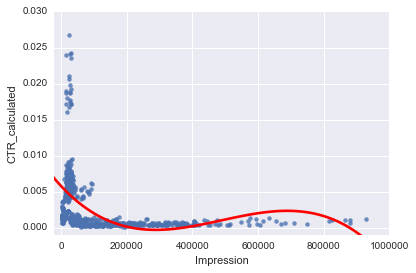

In [37]:
scat2 = seaborn.regplot(x="Impression",y="CTR_calculated",scatter=True,order=3,data=df, line_kws={'color': 'red'},ci=None)
plt.ylim(-0.001, 0.030)
plt.xlim(-20000, 1000000)

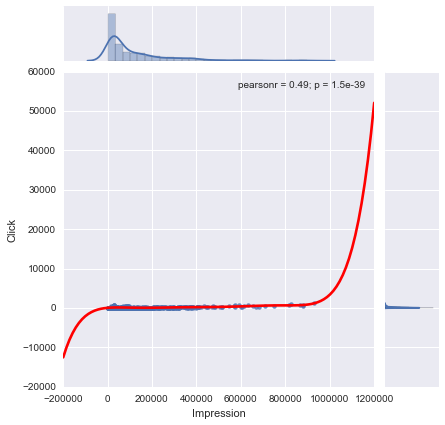

In [73]:
scat2_1= seaborn.jointplot(x="Impression",
                        y="Click",
                        scatter=True,order=7,
                        data=df, 
                        line_kws={'color': 'red'},
                        ci=None,
                        kind="reg")


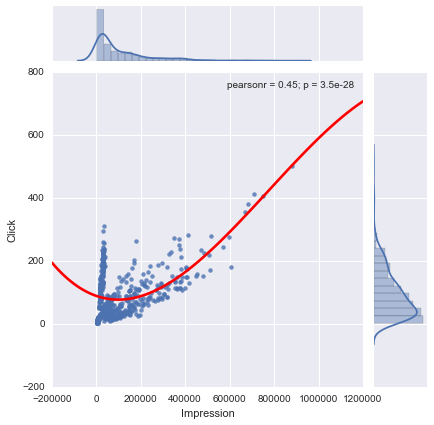

In [59]:
scat2 = seaborn.jointplot(x="Impression",
                        y="Click",
                        scatter=True,order=4,
                        data=df2, 
                        line_kws={'color': 'red'},
                        ci=None,
                        kind="reg")


(-20000, 1000000)

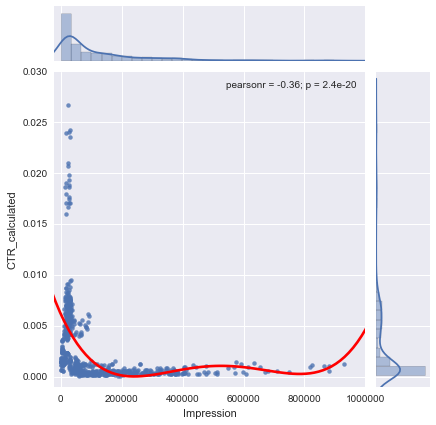

In [39]:
scat2 = seaborn.jointplot(x="Impression",
                        y="CTR_calculated",
                        scatter=True,order=4,
                        data=df, 
                        line_kws={'color': 'red'},
                        ci=None,
                        kind="reg")
plt.ylim(-0.001, 0.030)
plt.xlim(-20000, 1000000)

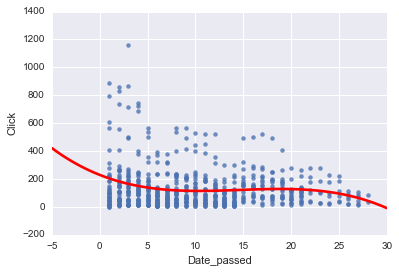

In [79]:
scat1 = seaborn.regplot(x="Date_passed",y="Click",scatter=True,order=3,data=df, line_kws={'color': 'red'},ci=None)


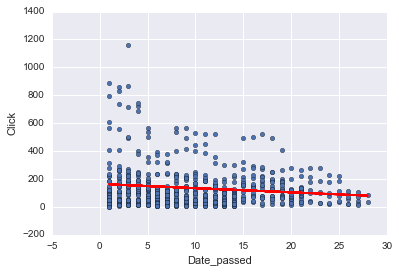

In [41]:
df.plot(kind="scatter",x="Date_passed",y="Click")
plt.plot(df["Date_passed"],slope*df["Date_passed"]+intercept,"-",color="red")

In [42]:
Banner = df.groupby(df['Banner number'])
Banner.describe()

CTR_calculated       Click  Date_passed     Impression  \
Banner number                                                                 
1             count      168.000000  168.000000   168.000000     168.000000   
              mean         0.007864  192.636905    11.291667   24207.470238   
              std          0.004824  132.698904     6.554565    6491.510420   
              min          0.003600   50.000000     1.000000   10233.000000   
              25%          0.005375  111.750000     6.000000   17492.000000   
              50%          0.006600  166.000000    11.000000   24870.500000   
              75%          0.007600  215.500000    16.250000   29275.000000   
              max          0.026700  736.000000    28.000000   38899.000000   
2             count       10.000000   10.000000    10.000000      10.000000   
              mean         0.001270   51.000000    15.700000  149690.300000   
              std          0.001308   34.003268    11.470251  134319.116844   
              min          0.000300   14.000000     1.000000    5775.000000   
              25%          0.000300   17.750000     3.250000    6328.750000   
              50%          0.000300   47.500000    22.500000  155418.500000   
              75%          0.002375   78.250000    24.750000  280398.750000   
              max          0.003700   97.000000    27.000000  306592.000000   
3             count      102.000000  102.000000   102.000000     102.000000   
              mean         0.000375   51.431373    10.470588  131779.813725   
              std          0.000182   35.307282     6.670024   43363.629240   
              min          0.000100    8.000000     1.000000   46353.000000   
              25%          0.000200   27.250000     5.000000  101675.500000   
              50%          0.000300   39.000000    10.000000  130393.500000   
              75%          0.000500   65.500000    15.000000  155482.000000   
              max          0.000800  183.000000    27.000000  239220.000000   
4             count        7.000000    7.000000     7.000000       7.000000   
              mean         0.001229  663.857143     4.000000  526618.285714   
              std          0.000095  304.578084     2.160247  234775.337843   
              min          0.001100  318.000000     1.000000  259993.000000   
              25%          0.001200  410.000000     2.500000  347628.500000   
              50%          0.001200  726.000000     4.000000  574421.000000   
...                             ...         ...          ...            ...   
8             std          0.001630  121.460375     6.634311   30981.309639   
              min          0.000300    9.000000     1.000000   29751.000000   
              25%          0.000700   33.750000     5.000000   47678.250000   
              50%          0.001100   65.500000    10.000000   61913.000000   
              75%          0.001500  143.500000    14.250000   79524.750000   
              max          0.006200  564.000000    28.000000  176897.000000   
9             count       42.000000   42.000000    42.000000      42.000000   
              mean         0.001502   39.928571     7.500000   30642.261905   
              std          0.000627   12.341469     4.079993   13683.398086   
              min          0.000500   19.000000     1.000000   14619.000000   
              25%          0.000800   28.000000     4.000000   22427.000000   
              50%          0.001600   43.000000     7.500000   27687.500000   
              75%          0.002100   50.000000    11.000000   32491.000000   
              max          0.002300   62.000000    14.000000   65537.000000   
11            count       14.000000   14.000000    14.000000      14.000000   
              mean         0.001536    7.000000     7.500000    4525.000000   
              std          0.000488    4.657500     4.183300    2147.158946   
              min          0.000800    3.000000     1.000000    1855.00

In [43]:
# # Pivot Table
# Banner_click_table = df.pivot(index='Banner number',columns = 'Date passed',values = 'Click')
# Banner_click_table
# Error occured

In [44]:

date_table = df.groupby(df['Date'])
date_table.mean()

,Banner number,Impression,Click,Date_passed,CTR_calculated,page_number
Date,,,,,,
Friday,5.280899,115830.202247,125.808989,11.449438,0.002844,1.629213
Monday,5.297872,149635.574468,154.287234,7.404255,0.002866,1.627660
Saturday,5.280899,85888.730337,84.101124,12.449438,0.002793,1.629213
Sunday,5.317647,91780.211765,89.294118,12.764706,0.002812,1.635294
Thursday,5.211111,134826.188889,146.977778,10.222222,0.002847,1.611111
Tuesday,5.211111,148708.088889,166.177778,8.222222,0.002970,1.611111
Wednesday,5.211111,148224.466667,163.822222,9.222222,0.002870,1.611111


In [45]:
date_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

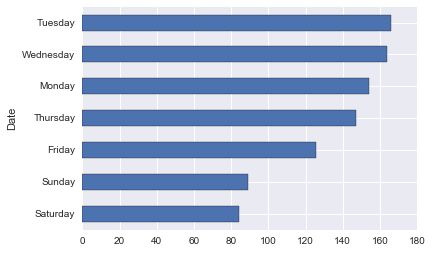

In [51]:
Date_plot = df.groupby(df['Date']).mean().sort_values(ascending=True,by='Click').plot(y='Click',kind='barh')
Date_plot.legend_.remove()


In [47]:
Banner = df.groupby(df['Banner number'])
Banner.describe()

CTR_calculated       Click  Date_passed     Impression  \
Banner number                                                                 
1             count      168.000000  168.000000   168.000000     168.000000   
              mean         0.007864  192.636905    11.291667   24207.470238   
              std          0.004824  132.698904     6.554565    6491.510420   
              min          0.003600   50.000000     1.000000   10233.000000   
              25%          0.005375  111.750000     6.000000   17492.000000   
              50%          0.006600  166.000000    11.000000   24870.500000   
              75%          0.007600  215.500000    16.250000   29275.000000   
              max          0.026700  736.000000    28.000000   38899.000000   
2             count       10.000000   10.000000    10.000000      10.000000   
              mean         0.001270   51.000000    15.700000  149690.300000   
              std          0.001308   34.003268    11.470251  134319.116844   
              min          0.000300   14.000000     1.000000    5775.000000   
              25%          0.000300   17.750000     3.250000    6328.750000   
              50%          0.000300   47.500000    22.500000  155418.500000   
              75%          0.002375   78.250000    24.750000  280398.750000   
              max          0.003700   97.000000    27.000000  306592.000000   
3             count      102.000000  102.000000   102.000000     102.000000   
              mean         0.000375   51.431373    10.470588  131779.813725   
              std          0.000182   35.307282     6.670024   43363.629240   
              min          0.000100    8.000000     1.000000   46353.000000   
              25%          0.000200   27.250000     5.000000  101675.500000   
              50%          0.000300   39.000000    10.000000  130393.500000   
              75%          0.000500   65.500000    15.000000  155482.000000   
              max          0.000800  183.000000    27.000000  239220.000000   
4             count        7.000000    7.000000     7.000000       7.000000   
              mean         0.001229  663.857143     4.000000  526618.285714   
              std          0.000095  304.578084     2.160247  234775.337843   
              min          0.001100  318.000000     1.000000  259993.000000   
              25%          0.001200  410.000000     2.500000  347628.500000   
              50%          0.001200  726.000000     4.000000  574421.000000   
...                             ...         ...          ...            ...   
8             std          0.001630  121.460375     6.634311   30981.309639   
              min          0.000300    9.000000     1.000000   29751.000000   
              25%          0.000700   33.750000     5.000000   47678.250000   
              50%          0.001100   65.500000    10.000000   61913.000000   
              75%          0.001500  143.500000    14.250000   79524.750000   
              max          0.006200  564.000000    28.000000  176897.000000   
9             count       42.000000   42.000000    42.000000      42.000000   
              mean         0.001502   39.928571     7.500000   30642.261905   
              std          0.000627   12.341469     4.079993   13683.398086   
              min          0.000500   19.000000     1.000000   14619.000000   
              25%          0.000800   28.000000     4.000000   22427.000000   
              50%          0.001600   43.000000     7.500000   27687.500000   
              75%          0.002100   50.000000    11.000000   32491.000000   
              max          0.002300   62.000000    14.000000   65537.000000   
11            count       14.000000   14.000000    14.000000      14.000000   
              mean         0.001536    7.000000     7.500000    4525.000000   
              std          0.000488    4.657500     4.183300    2147.158946   
              min          0.000800    3.000000     1.000000    1855.00

In [48]:
Banner['CTR_calculated'].mean()

Banner number
1     0.007864
2     0.001270
3     0.000375
4     0.001229
6     0.000570
7     0.000511
8     0.001666
9     0.001502
11    0.001536
12    0.001900
Name: CTR_calculated, dtype: float64

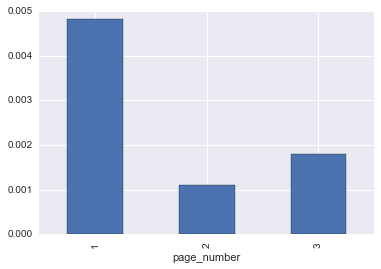

In [49]:
Page_efficiency = df.groupby(df['page_number'])
Page_efficiency['CTR_calculated'].mean().plot(kind='bar')

In [50]:
for i in range(1,12):
    print('This is Banner '+str(i))
    a = df[df['Banner number']==i]['Click']
    print(type(a))

This is Banner 1
<class 'pandas.core.series.Series'>
This is Banner 2
<class 'pandas.core.series.Series'>
This is Banner 3
<class 'pandas.core.series.Series'>
This is Banner 4
<class 'pandas.core.series.Series'>
This is Banner 5
<class 'pandas.core.series.Series'>
This is Banner 6
<class 'pandas.core.series.Series'>
This is Banner 7
<class 'pandas.core.series.Series'>
This is Banner 8
<class 'pandas.core.series.Series'>
This is Banner 9
<class 'pandas.core.series.Series'>
This is Banner 10
<class 'pandas.core.series.Series'>
This is Banner 11
<class 'pandas.core.series.Series'>
